# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Database

## read data from excel

In [2]:
import pandas as pd
data = pd.read_excel(r'C:\Users\ASUS\Desktop\machine learning\MLfinalReport\AHIdata.xlsx')
print(data)

     Aligned CVHR-OR-CEI   BMI  Age  supine index  neck  desaturation index  \
0                   24.9  23.2   32          19.9  37.0                 0.2   
1                   16.9  23.9   50           5.4  35.0                 5.8   
2                   11.5  28.0   63           9.8  42.0                15.8   
3                   53.7  30.4   43          41.7  40.0                56.1   
4                   13.5  26.4   27           7.3  37.0                 6.7   
..                   ...   ...  ...           ...   ...                 ...   
114                 37.9  30.7   36           NaN  43.0                26.7   
115                 76.8  39.4   44           NaN  44.0                79.9   
116                 35.6  26.1   56           NaN  38.0                27.9   
117                 28.7  27.2   47           NaN  39.0                65.0   
118                 30.0  29.4   22           NaN  37.0                 1.7   

     rescored AHI  CVHRI   CEI  Unnamed: 9 Unnamed:

## extract y from excel

In [3]:
df = pd.DataFrame(data, columns=['rescored AHI'])
print(type(df))#datatype is pd.dataframe not numpy array
df_2D = df.to_numpy()#convert into numpy array


<class 'pandas.core.frame.DataFrame'>


In [4]:
y = df_2D.flatten()#flatten into 1d array

In [5]:
for count in range (0, 119):
    if y[count]>=30:     #AHI>=30, class:3
        y[count]=3
    elif y[count]>=15:  #30>AHI>=15, class:2
        y[count]=2
    elif y[count]>=5:    #15>AHI>=5, class:1
        y[count]=1
    else:
        y[count]=0       #5>AHI, class:0 

## extract input from excel

In [6]:
#BMI
x1 = pd.DataFrame(data, columns=['BMI'])
x1_2D = x1.to_numpy()#convert into numpy array
x_bmi = x1_2D.flatten()#flatten into 1d array
#Age
x2 = pd.DataFrame(data, columns=['Age'])
x2_2D = x2.to_numpy()#convert into numpy array
x_age = x2_2D.flatten()#flatten into 1d array
#neck
x3 = pd.DataFrame(data, columns=['neck'])
x3_2D = x3.to_numpy()#convert into numpy array
x_neck = x3_2D.flatten()#flatten into 1d array
#desaturatino index
x4 = pd.DataFrame(data, columns=['desaturation index'])
x4_2D = x4.to_numpy()#convert into numpy array
x_dsi = x4_2D.flatten()#flatten into 1d array
#CVHR-OR_CEI
x5 = pd.DataFrame(data, columns=['Aligned CVHR-OR-CEI'])
x5_2D = x5.to_numpy()#convert into numpy array
x_cvhrorcei = x5_2D.flatten()#flatten into 1d array
#CVHRI
x6 = pd.DataFrame(data, columns=['CVHRI'])
x6_2D = x6.to_numpy()#convert into numpy array
x_cvhri = x6_2D.flatten()#flatten into 1d array
#CEI
x7 = pd.DataFrame(data, columns=['CEI'])
x7_2D = x7.to_numpy()#convert into numpy array
x_cei = x7_2D.flatten()#flatten into 1d array

# training a decision tree model

## decide your inputs

In [7]:
X = np.stack((x_cvhri, x_cei), axis=-1)

## train test validation split

In [8]:
from sklearn.model_selection import train_test_split 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.4, shuffle=False)

## create a decision tree classifier

### decide max_depth

In [9]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth':range(1, 20, 1)}

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(tree_clf, param_dist, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_val, y_val)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, scoring='accuracy')

In [11]:
grid.best_params_

{'max_depth': 2}

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=grid.best_params_.get('max_depth'), random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Data visualization

## export_text visualization

In [13]:
# from sklearn import tree
# text_representation = tree.export_text(tree_clf, feature_names=("CVHRI", "CEI"))
# print(text_representation)

## plot tree visualization

In [14]:
# fig = plt.figure(figsize=(60, 20))
# _ = tree.plot_tree(tree_clf, feature_names = ("CVHRI", "CEI"), filled=True)

# testing data evaluation

reference: https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1

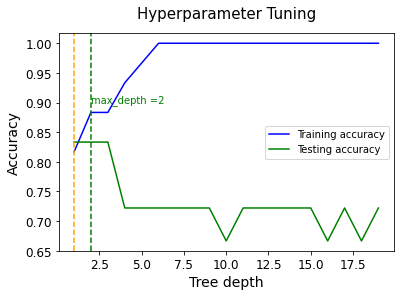

In [15]:
from sklearn.metrics import accuracy_score as accuracy #import library of mse

max_depths = range(1, 20)
#training accuracy curve
training_accuracy = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)#use the same training set model
    training_accuracy.append(accuracy(y_train, model_1.predict(X_train)))#training accuracy
#testing accuracy curve
testing_accuracy = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)#use the same training set model
    testing_accuracy.append(accuracy(y_test, model_1.predict(X_test)))#testing accuracy
#find the accuracy on the validation accuracy curve
optimized_max_depth = grid.best_params_.get('max_depth')
max_accuracy = np.argmax(testing_accuracy)
#graph setting
plt.plot(max_depths, training_accuracy, color='blue', label='Training accuracy')
plt.plot(max_depths, testing_accuracy, color='green', label='Testing accuracy')
plt.xlabel('Tree depth')
plt.axvline(max_accuracy+1, color='orange', linestyle='--')#becuse list counts from 0, we need to plus 1
plt.annotate('optimum ='+(max_accuracy+1).astype(str), xy=(max_accuracy, max(testing_accuracy)), color='orange')
plt.axvline(optimized_max_depth, color='green', linestyle='--')
plt.annotate('max_depth ='+str(optimized_max_depth), xy=(optimized_max_depth, 0.9), color='green')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('accuracy.png')

#   testing data evaluation

In [16]:
from sklearn import metrics
expected = y_test
predicted = tree_clf.predict(X_test)

print("classification for classifier %s:\n%s\n"
      % (tree_clf, metrics.classification_report(expected, predicted)))

classification for classifier DecisionTreeClassifier(max_depth=2, random_state=42):
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73         7
         1.0       0.79      1.00      0.88        11

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18




In [17]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8333333333333334


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73         7
         1.0       0.79      1.00      0.88        11

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18



## AUC

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_score = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
area=roc_auc_score(y_test, y_score)
metrics.auc(fpr, tpr)

0.8376623376623376

<function matplotlib.pyplot.show(close=None, block=None)>

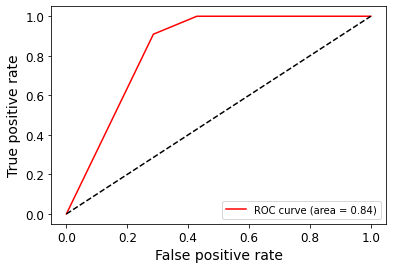

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show

## confusion matrix

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 4,  3],
       [ 0, 11]], dtype=int64)

In [22]:
# from matplotlib.colors import ListedColormap

# def plot_decision_boundary(clf, X, y, axes=[0, 40, 0, 100], iris=True, legend=False, plot_training=True):
#     x1s = np.linspace(axes[0], axes[1], 100)
#     x2s = np.linspace(axes[2], axes[3], 100)
#     x1, x2 = np.meshgrid(x1s, x2s)
#     X_new = np.c_[x1.ravel(), x2.ravel()]
#     y_pred = clf.predict(X_new).reshape(x1.shape)
#     custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
#     plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
#     if not iris:
#         custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
#         plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
#     if plot_training:
#         plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="no apenia")
#         plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="low AHI")
#         plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="medium AHI")
#         plt.plot(X[:, 0][y==3], X[:, 1][y==3], "r*", label="high AHI")
#         plt.axis(axes)
#     if iris:
#         plt.xlabel("BMI", fontsize=14)
#         plt.ylabel("CVHR_OR_CEI", fontsize=14)
#     else:
#         plt.xlabel(r"$x_1$", fontsize=18)
#         plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
#     if legend:
#         plt.legend(loc="lower right", fontsize=14)

# plt.figure(figsize=(8, 4))
# plot_decision_boundary(tree_clf, X_train, y_train)
# # plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
# # plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
# # plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
# # plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
# # plt.text(1.40, 1.0, "Depth=0", fontsize=15)
# # plt.text(3.2, 1.80, "Depth=1", fontsize=13)
# # plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# save_fig("decision_tree_decision_boundaries_plot")
# plt.show()